# load

In [1]:
print(load("/home/da528/ATAC_Analysis/cut_run/zhixin_analysis/software/iterbi/data/GRCh38.mm10.gene.annotation.backup.Rdata"))

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file '/home/da528/ATAC_Analysis/cut_run/zhixin_analysis/software/iterbi/data/GRCh38.mm10.gene.annotation.backup.Rdata', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


# read in

In [22]:
M60.count <- read.table("featureCounts_GRCh38_101_Merck60_RNA-seq.txt", skip = 1, header = T)

In [23]:
M60.count$Chr <- NULL
M60.count$Start <- NULL
M60.count$End <- NULL
M60.count$Strand <- NULL
M60.count$Length <- NULL

In [25]:
M60.count$gene <- gene.anno.GRCh38.v3[ M60.count$Geneid ,]$gene_name

In [26]:
M60.count <- M60.count[!duplicated(M60.count$gene),]

In [27]:
M60.count <- M60.count[!is.na(M60.count$gene),]

In [28]:
M60.count$Geneid <- NULL

In [29]:
rownames(M60.count) <- M60.count$gene
M60.count$gene <- NULL

In [32]:
colnames(M60.count) <- gsub(pattern = "Aligned.sortedByCoord.out.bam", replacement = "", colnames(M60.count))

In [34]:
dir.create("keyRdata")

In [35]:
save(M60.count, file = "keyRdata/M60.count.Rdata")

In [92]:
# M60.count

24 = 24 hr
other = 48 hr

H = HT115
L = LS180

D = DMSO
M = M60

M2 = high
M4 = medium
M8 = low

1 = rep 1
2 = rep 2

SP = Sox9 overexpression
SN = no Sox9 overexpression

In [184]:
MRK60_meta <- read.csv("MRK60_meta.csv", row.names = 1)

In [185]:
MRK60_meta

,cell_line,treatment,dose,replicate,duration,expriment
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
HD1,HT115,DMSO,Control,1,48,HT115
HD2,HT115,DMSO,Control,2,48,HT115
HM81,HT115,M60,M60-low,1,48,HT115
HM82,HT115,M60,M60-low,2,48,HT115
HM41,HT115,M60,M60-medium,1,48,HT115
HM42,HT115,M60,M60-medium,2,48,HT115
H24M21,HT115,M60,M60-high-24,1,24,HT115
H24M22,HT115,M60,M60-high-24,2,24,HT115
HM21,HT115,M60,M60-high,1,48,HT115


# edgeR
tutorial
- [RNA-seq analysis in R](https://combine-australia.github.io/RNAseq-R/06-rnaseq-day1.html#Data_files_and_Resources)
- [RNA sequencing data analysis using R and the Artemis HPC](https://sydney-informatics-hub.github.io/training-RNAseq/07-CounttableEDA/index.html)

In [7]:
# BiocManager::install("edgeR")

In [8]:
library(edgeR)

Loading required package: limma



In [9]:
print(load("keyRdata/M60.count.Rdata"))

[1] "M60.count"  "scaleCPM"   "MRK60_meta"


In [10]:
head(MRK60_meta)

,cell_line,treatment,dose,replicate,duration,expriment,Endocrine,Enterocyte,Goblet,Paneth,Stem,TA,Tuft
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD1,HT115,DMSO,Control,1,48,HT115,0.07460535,-0.139603808,-0.16003270,0.11913672,0.097005362,0.22261313,0.16902284
HD2,HT115,DMSO,Control,2,48,HT115,0.04001937,-0.049659760,-0.11657084,-0.03868248,0.002123237,0.10105790,0.12775948
HM81,HT115,M60,M60-low,1,48,HT115,-0.17875047,0.032841821,-0.17422742,0.17544135,0.303882877,0.44166522,-0.11183581
HM82,HT115,M60,M60-low,2,48,HT115,-0.09511261,-0.077834984,-0.15709124,0.08737929,0.259976545,0.37823682,-0.04740529
HM41,HT115,M60,M60-medium,1,48,HT115,0.23392705,0.006547876,-0.08352899,0.25021090,0.076813874,0.10185946,0.36390155
HM42,HT115,M60,M60-medium,2,48,HT115,0.28359362,-0.092593070,-0.07659535,0.11334451,0.064114487,0.06060188,0.35172480


In [11]:
y <- DGEList(M60.count)

In [43]:
names(y)

[1] "counts"  "samples"

In [49]:
y$samples <- cbind(y$samples, MRK60_meta[rownames(y$samples),])

In [51]:
# Obtain CPMs
myCPM <- cpm(M60.count)
# Have a look at the output
head(myCPM)

,H24M21,H24M22,HD1,HD2,HM21,HM22,HM41,HM42,HM81,HM82,⋯,LM81,LM82,LMSN1,LMSN2,LMSP1,LMSP2,LSSN1,LSSN2,LSSP1,LSSP2
MIR1302-2HG,0.00000000,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0,0,0.03780546,0,⋯,0,0.02765775,0.00000000,0,0,0,0.03751581,0,0.0357808,0.0000000
FAM138A,0.00000000,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0,0,0.00000000,0,⋯,0,0.00000000,0.00000000,0,0,0,0.00000000,0,0.0000000,0.0000000
OR4F5,0.00000000,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0,0,0.00000000,0,⋯,0,0.00000000,0.00000000,0,0,0,0.00000000,0,0.0000000,0.0000000
AL627309.1,0.07013626,0.06923166,0.132589,0.09990905,0.0726013,0.00000000,0,0,0.00000000,0,⋯,0,0.00000000,0.03287431,0,0,0,0.00000000,0,0.0715616,0.1001405
AL627309.3,0.00000000,0.00000000,0.000000,0.00000000,0.0000000,0.00000000,0,0,0.00000000,0,⋯,0,0.00000000,0.00000000,0,0,0,0.00000000,0,0.0000000,0.0000000
AL627309.2,0.00000000,0.03461583,0.000000,0.00000000,0.0000000,0.03011614,0,0,0.00000000,0,⋯,0,0.00000000,0.00000000,0,0,0,0.00000000,0,0.0000000,0.0000000


In [52]:
# Which values in myCPM are greater than 0.5?
thresh <- myCPM > 0.5
# This produces a logical matrix with TRUEs and FALSEs
head(thresh)

,H24M21,H24M22,HD1,HD2,HM21,HM22,HM41,HM42,HM81,HM82,⋯,LM81,LM82,LMSN1,LMSN2,LMSP1,LMSP2,LSSN1,LSSN2,LSSP1,LSSP2
MIR1302-2HG,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4F5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [53]:
# Summary of how many TRUEs there are in each row
# There are 11433 genes that have TRUEs in all 12 samples.
table(rowSums(thresh))


    0     1     2     3     4     5     6     7     8     9    10    11    12 
15653   767   457   310   340   270   197   186   199   188   318   171   128 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
  118   123   122   112   119   125   119   123   113   243   154   114   122 
   26    27    28    29    30    31    32 
  138   115   223   177   227   295 11186 

In [54]:
# we would like to keep genes that have at least 2 TRUES in each row of thresh
keep <- rowSums(thresh) >= 2
summary(keep)

   Mode   FALSE    TRUE 
logical   16420   16832 

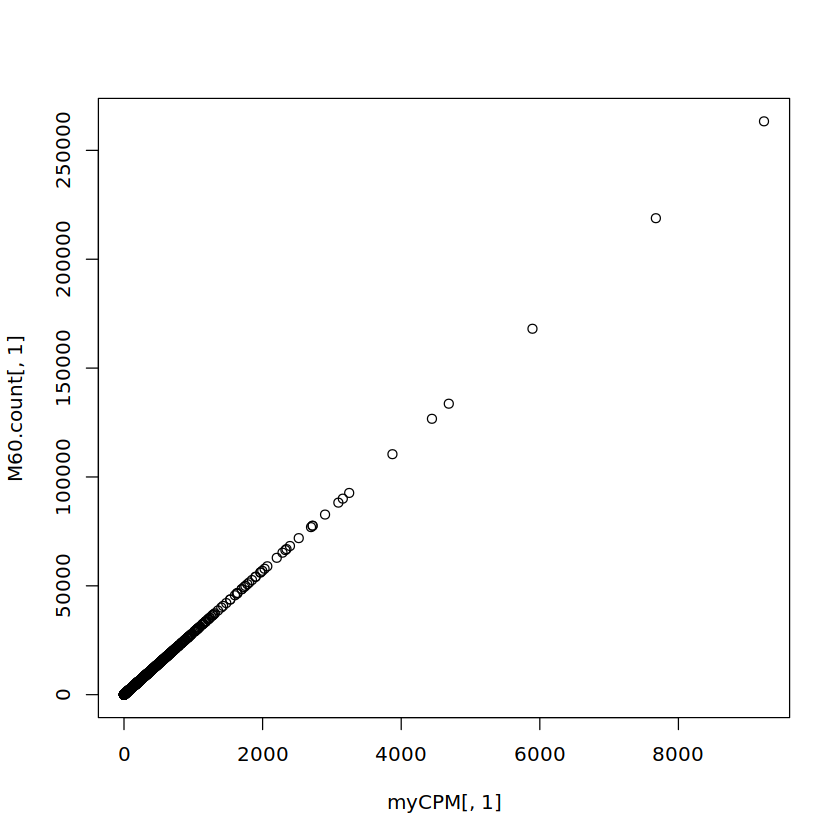

In [56]:
# Let's have a look and see whether our threshold of 0.5 does indeed correspond to a count of about 10-15
# We will look at the first sample
plot(myCPM[,1],M60.count[,1])

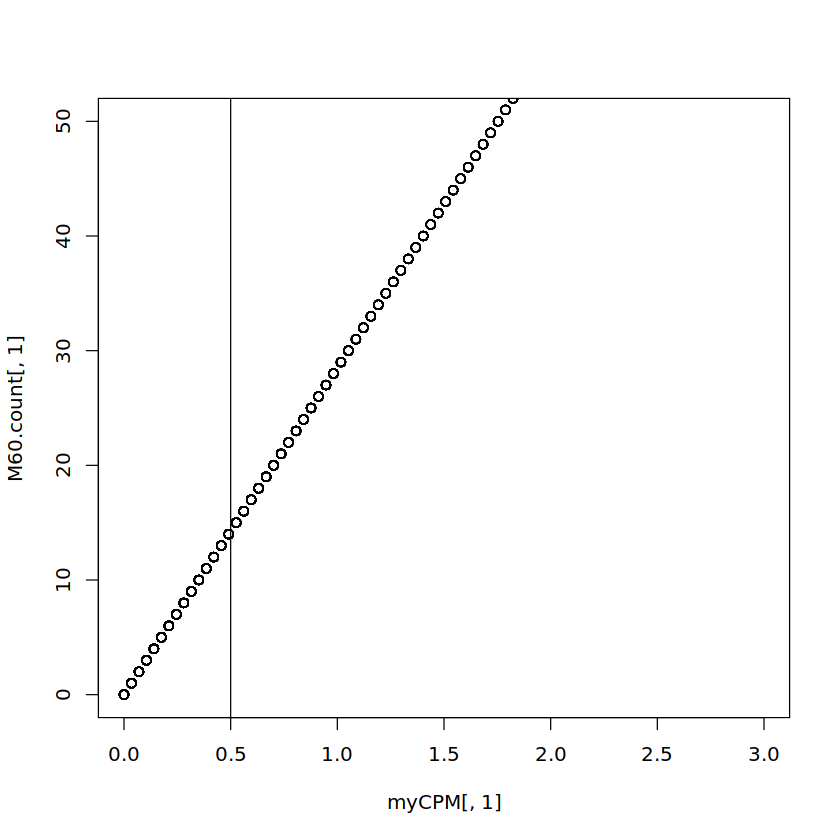

In [57]:
# Let us limit the x and y-axis so we can actually look to see what is happening at the smaller counts
plot(myCPM[,1],M60.count[,1],ylim=c(0,50),xlim=c(0,3))
# Add a vertical line at 0.5 CPM
abline(v=0.5)

In [58]:
y <- y[keep, keep.lib.sizes=FALSE]

In [59]:
y$samples$lib.size

[1] 28505399 28877467 30158653 30018023 27534808 33190245 28743725 31006025
 [9] 26440724 29176115 29359245 31135874 27924085 30501005 28408977 36093010
[17] 30450476 29282596 30047382 27799248 29571015 29220372 29158465 36144991
[25] 30411132 34773806 36205162 34803799 26646608 25775937 27937706 29946276

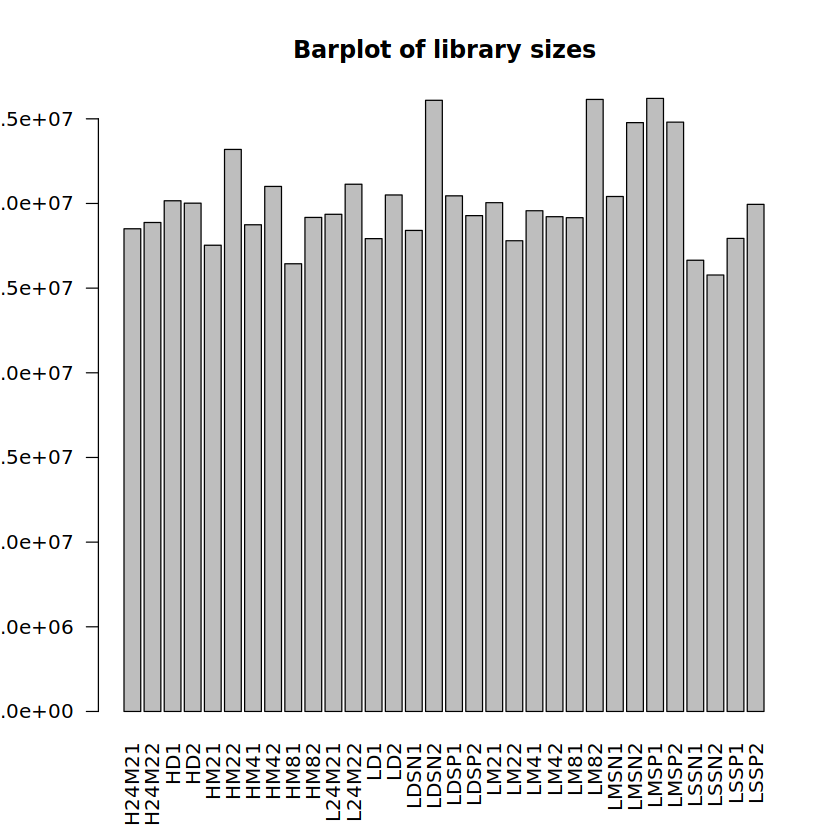

In [60]:
# The names argument tells the barplot to use the sample names on the x-axis
# The las argument rotates the axis names
barplot(y$samples$lib.size,names=colnames(y),las=2)
# Add a title to the plot
title("Barplot of library sizes")

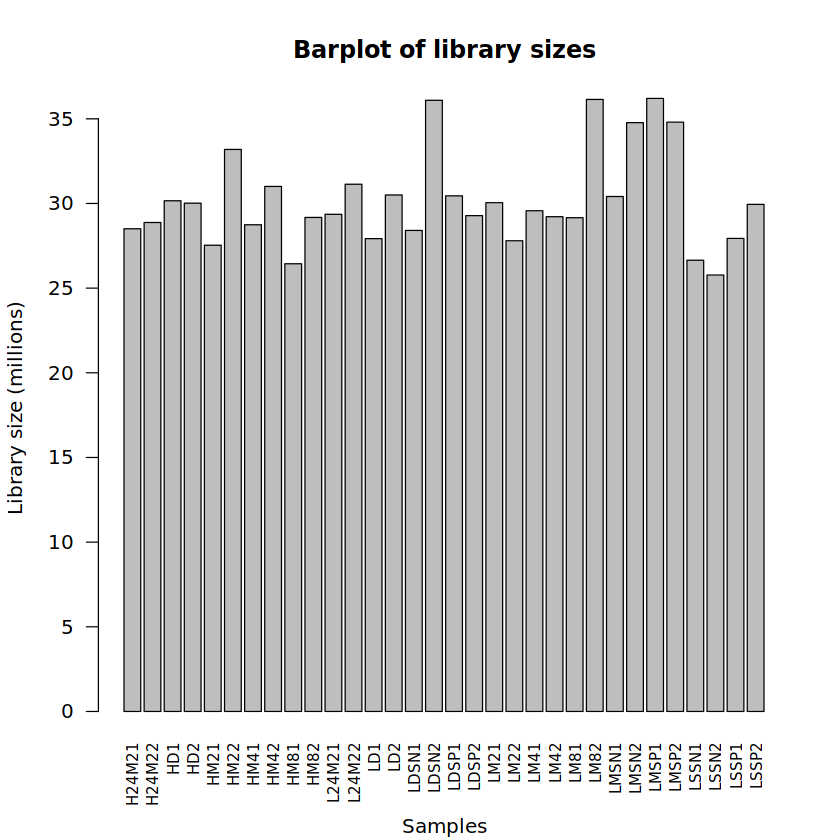

In [61]:
# we can also adjust the labelling if we want
barplot(y$samples$lib.size/1e06, names=colnames(y), las=2, ann=FALSE, cex.names=0.75)
mtext(side = 1, text = "Samples", line = 4)
mtext(side = 2, text = "Library size (millions)", line = 3)
title("Barplot of library sizes")

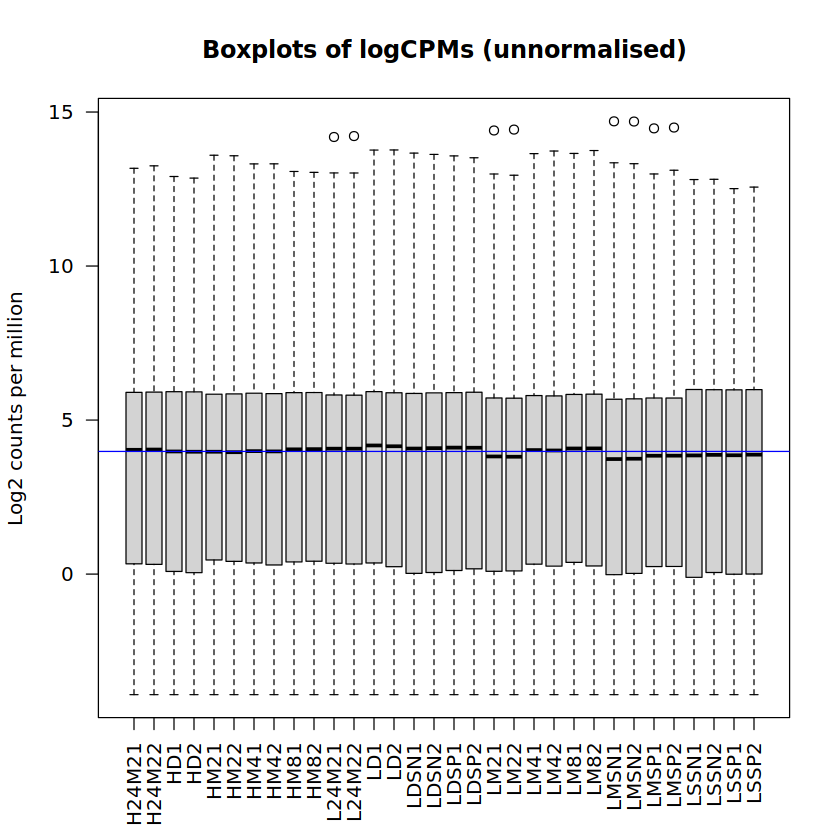

In [62]:
# Get log2 counts per million
logcounts <- cpm(y,log=TRUE)
# Check distributions of samples using boxplots
boxplot(logcounts, xlab="", ylab="Log2 counts per million",las=2)
# Let's add a blue horizontal line that corresponds to the median logCPM
abline(h=median(logcounts),col="blue")
title("Boxplots of logCPMs (unnormalised)")

In [65]:
?plotMDS

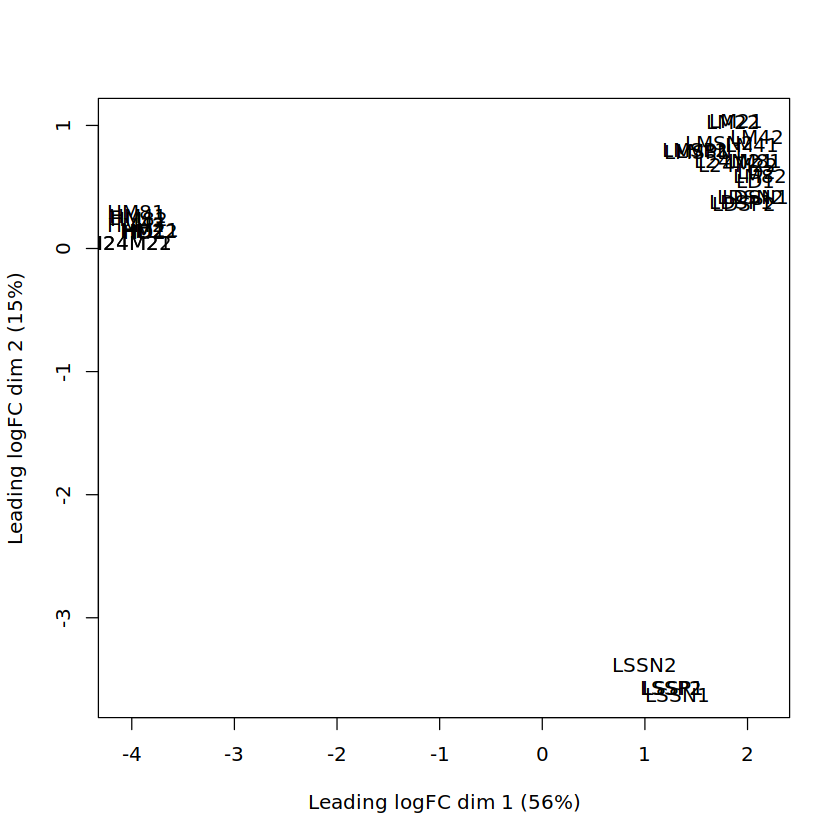

In [63]:
plotMDS(y)

In [67]:
library(stringr)

In [73]:
res.pca <- prcomp(t(logcounts))
colors <- y$samples$treatment

In [78]:
# install.packages("factoextra")

In [89]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


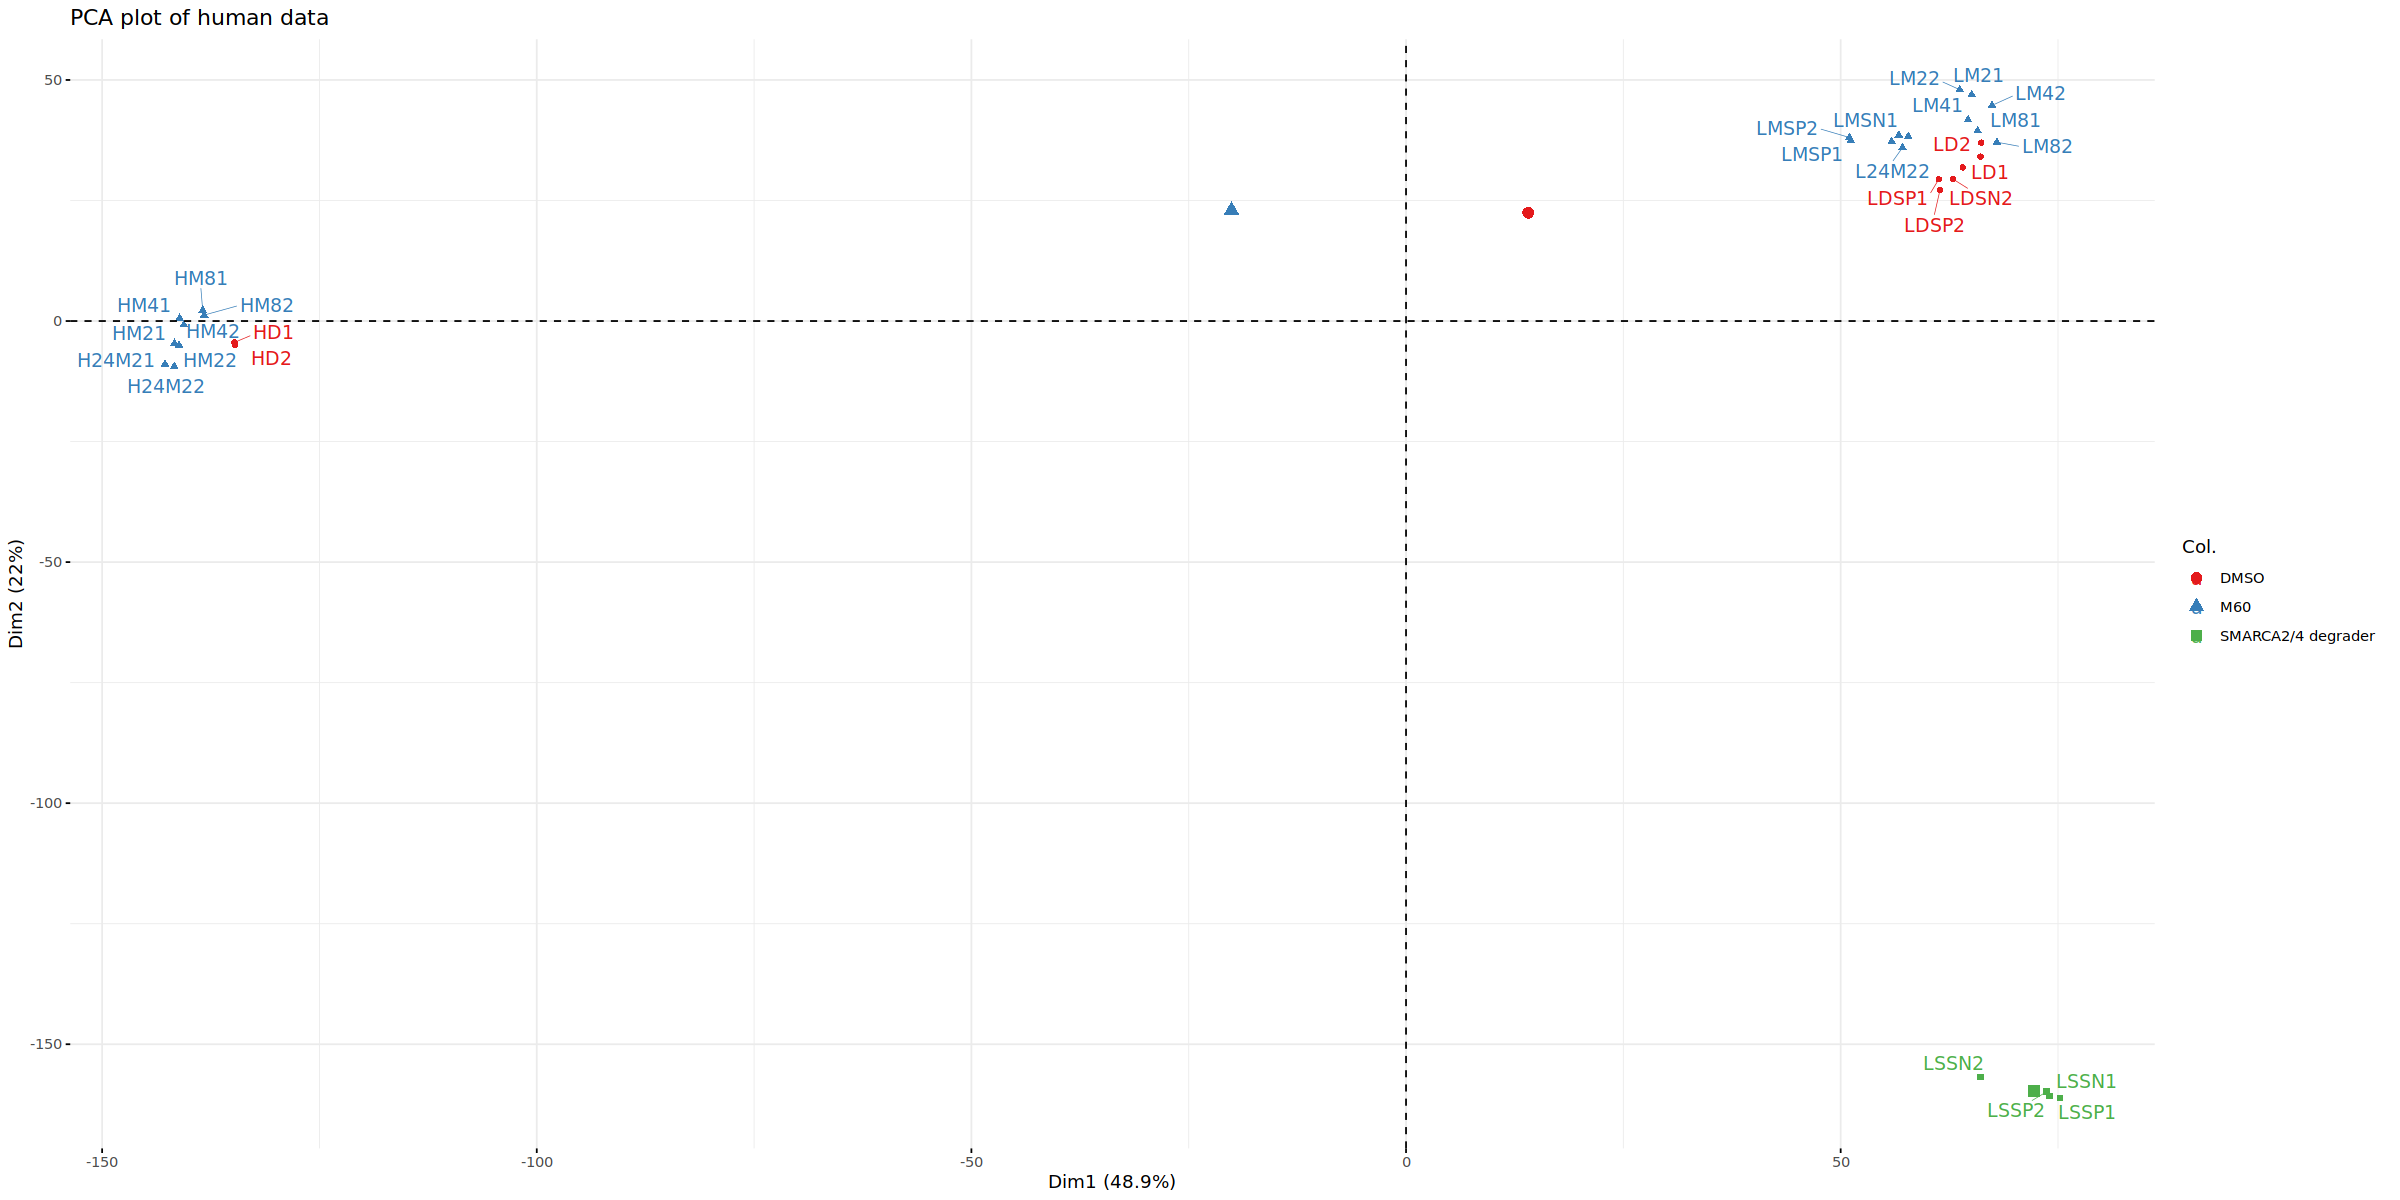

In [95]:
options(repr.plot.width=20, repr.plot.height=10)
fviz_pca_ind(res.pca,
             col.ind = colors,
             palette = "Set1",
             repel = TRUE,    # Avoid text overlapping
             title = "PCA plot of human data"
             )

In [91]:
# MRK60_meta

In [82]:
MRK60_meta$treatment <- factor(MRK60_meta$treatment, levels = unique(MRK60_meta$treatment))

In [83]:
# We specify the option to let us plot two plots side-by-sde
par(mfrow=c(1,2))
# Let's set up colour schemes for CellType
# How many cell types and in what order are they stored?
levels(MRK60_meta$treatment)

[1] "M60"                "DMSO"               "SMARCA2/4 degrader"

In [87]:
## Let's choose purple for basal and orange for luminal
col.cell <- c("purple","orange","red")[MRK60_meta$treatment]
data.frame(MRK60_meta$treatment,col.cell)

MRK60_meta.treatment,col.cell
<fct>,<chr>
M60,purple
M60,purple
DMSO,orange
DMSO,orange
M60,purple
M60,purple
M60,purple
M60,purple
M60,purple


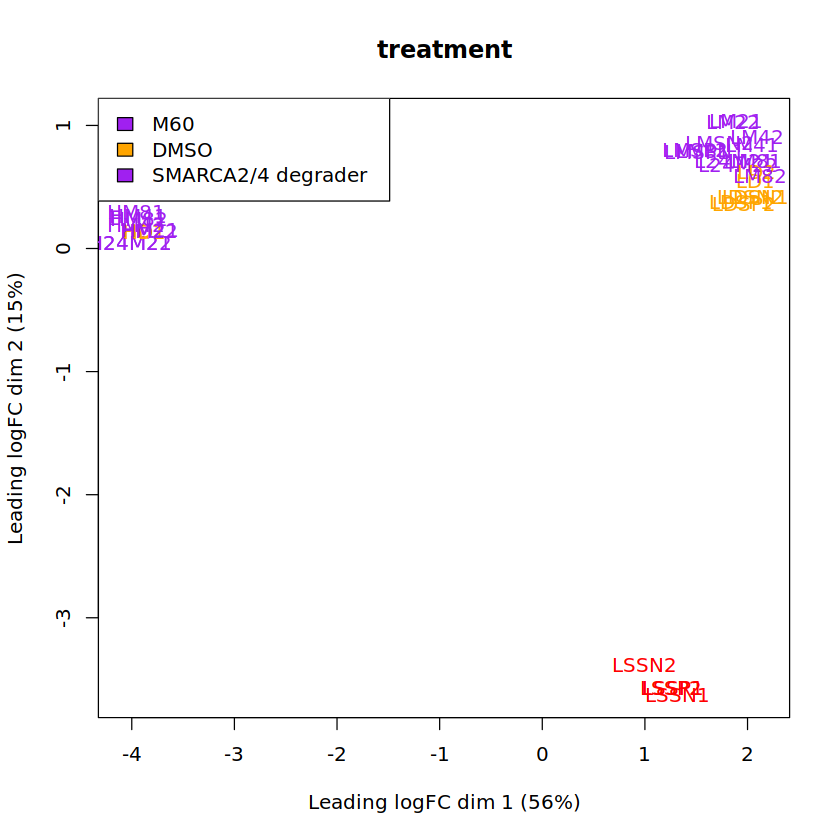

In [88]:
# Redo the MDS with cell type colouring
plotMDS(y,col=col.cell)
# Let's add a legend to the plot so we know which colours correspond to which cell type
legend("topleft",fill=c("purple","orange"),legend=levels(MRK60_meta$treatment))
# Add a title
title("treatment")

In [98]:
# Apply normalisation to DGEList object
y <- calcNormFactors(y)

In [99]:
y$samples

,group,lib.size,norm.factors,cell_line,treatment,dose,replicate
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>
H24M21,1,28505399,1.0461510,HT115,M60,high,1
H24M22,1,28877467,1.0462161,HT115,M60,high,2
HD1,1,30158653,1.0227975,HT115,DMSO,no,1
HD2,1,30018023,1.0189024,HT115,DMSO,no,2
HM21,1,27534808,1.0284683,HT115,M60,high,1
HM22,1,33190245,1.0269552,HT115,M60,high,2
HM41,1,28743725,1.0299651,HT115,M60,medium,1
HM42,1,31006025,1.0216623,HT115,M60,medium,2
HM81,1,26440724,1.0463194,HT115,M60,low,1


In [218]:
# par(mfrow=c(1,2))
# plotMD(logcounts,column = 7)
# abline(h=0,col="grey")
# plotMD(logcounts,column = 11)
# abline(h=0,col="grey")

In [219]:
# par(mfrow=c(1,2))
# plotMD(y,column = 7)
# abline(h=0,col="grey")
# plotMD(y,column = 11)
# abline(h=0,col="grey")

## subset analysis

## boxplot

In [26]:
library(ggplot2)

In [118]:
scaleCPM <- t(scale(t(myCPM), center = T, scale = T))

In [119]:
scaleCPM[is.na(scaleCPM)] <- 0

In [12]:
apply(scaleCPM, 1, mean)[1:20]

MIR1302-2HG       FAM138A         OR4F5    AL627309.1    AL627309.3 
-2.081668e-17  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
   AL627309.2    AL627309.4    AL732372.1        OR4F29    AC114498.1 
 0.000000e+00  0.000000e+00  1.040834e-17  0.000000e+00  0.000000e+00 
       OR4F16    AL669831.2    AL669831.5        FAM87B     LINC00115 
 0.000000e+00  0.000000e+00 -5.139118e-17  4.370351e-17  4.683753e-17 
       FAM41C    AL645608.7    AL645608.3    AL645608.5    AL645608.1 
-1.908196e-17 -1.185643e-16 -8.760354e-17  3.122502e-17 -3.642919e-17

In [186]:
# save(M60.count, scaleCPM, MRK60_meta, file = "keyRdata/M60.count.Rdata")

In [61]:
print(load("keyRdata/M60.count.Rdata"))

[1] "M60.count"  "scaleCPM"   "MRK60_meta"


In [62]:
print(load("keyRdata/wt.markers.Rdata"))
gut_epithelium.markers <- subset(markers_rna, RNA.logFC>0.5 & RNA.padj<0.05 & RNA.pval < 0.05)

[1] "wt.markers.raw"      "wt.markers.sortP"    "wt.markers.sortFC"  
[4] "TF.markers"          "markers_rna"         "markers_motifs"     
[7] "all.combined.marker"


In [63]:
# epithe_SI.markers <- read.csv("/home/zz950/reference/epithe_SI.markers.rmDup.csv", row.names = 1)
# gut_epithelium.markers <- epithe_SI.markers
# gut_epithelium.markers$RNA.group <- gut_epithelium.markers$cluster

In [64]:
table(gut_epithelium.markers$RNA.group)


 Endocrine Enterocyte     Goblet     Paneth       Stem         TA       Tuft 
       259         39        113        182        348        465        101 

In [65]:
head(gut_epithelium.markers)

,RNA.feature,RNA.group,RNA.avgExpr,RNA.logFC,RNA.statistic,RNA.auc,RNA.pval,RNA.padj,RNA.pct_in,RNA.pct_out,gene
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,St18,Endocrine,1.0852742,1.0248802,1569620,0.8261595,0.000000e+00,0.000000e+00,68.88889,3.3064898,St18
24,Cspp1,Endocrine,0.8634744,0.6401324,1469090,0.7732457,2.125366e-60,5.094050e-59,73.33333,25.2202748,Cspp1
35,Kcnb2,Endocrine,2.9141840,2.9057117,1846042,0.9716525,0.000000e+00,0.000000e+00,94.44444,0.7200379,Kcnb2
60,Fam135a,Endocrine,1.0147106,0.6796466,1471592,0.7745631,1.904021e-48,3.787733e-47,78.33333,37.6409285,Fam135a
181,Ankrd44,Endocrine,0.6254267,0.5842171,1409672,0.7419719,1.518888e-165,9.924880e-164,52.22222,5.0592136,Ankrd44
330,Scg2,Endocrine,0.7055919,0.6999218,1278070,0.6727038,0.000000e+00,0.000000e+00,35.00000,0.6158219,Scg2


In [72]:
for (i in unique(gut_epithelium.markers$RNA.group)) {
    print(i)
    tmp.markers <- subset(gut_epithelium.markers, `RNA.group`==i)$gene
    tmp.markers <- toupper(tmp.markers)
    tmp.markers <- tmp.markers[tmp.markers %in% rownames(scaleCPM)]
    MRK60_meta[[i]] <- colMeans(scaleCPM[tmp.markers,])
    # break
}

[1] "Endocrine"
[1] "Enterocyte"
[1] "Goblet"
[1] "Paneth"
[1] "Stem"
[1] "TA"
[1] "Tuft"


In [73]:
unique(MRK60_meta$expriment)

[1] "HT115"     "LS180"     "LS180-two"

In [74]:
tmp.meta <- subset(MRK60_meta, expriment %in% c("HT115","LS180"))

In [75]:
unique(tmp.meta$dose)

[1] "Control"     "M60-low"     "M60-medium"  "M60-high-24" "M60-high"

In [76]:
tmp.meta$dose <- factor(tmp.meta$dose, levels = unique(tmp.meta$dose))

In [77]:
head(tmp.meta)

,cell_line,treatment,dose,replicate,duration,expriment,Endocrine,Enterocyte,Goblet,Paneth,Stem,TA,Tuft
,<chr>,<chr>,<fct>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD1,HT115,DMSO,Control,1,48,HT115,0.07460535,-0.139603808,-0.16003270,0.11913672,0.097005362,0.22261313,0.16902284
HD2,HT115,DMSO,Control,2,48,HT115,0.04001937,-0.049659760,-0.11657084,-0.03868248,0.002123237,0.10105790,0.12775948
HM81,HT115,M60,M60-low,1,48,HT115,-0.17875047,0.032841821,-0.17422742,0.17544135,0.303882877,0.44166522,-0.11183581
HM82,HT115,M60,M60-low,2,48,HT115,-0.09511261,-0.077834984,-0.15709124,0.08737929,0.259976545,0.37823682,-0.04740529
HM41,HT115,M60,M60-medium,1,48,HT115,0.23392705,0.006547876,-0.08352899,0.25021090,0.076813874,0.10185946,0.36390155
HM42,HT115,M60,M60-medium,2,48,HT115,0.28359362,-0.092593070,-0.07659535,0.11334451,0.064114487,0.06060188,0.35172480


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


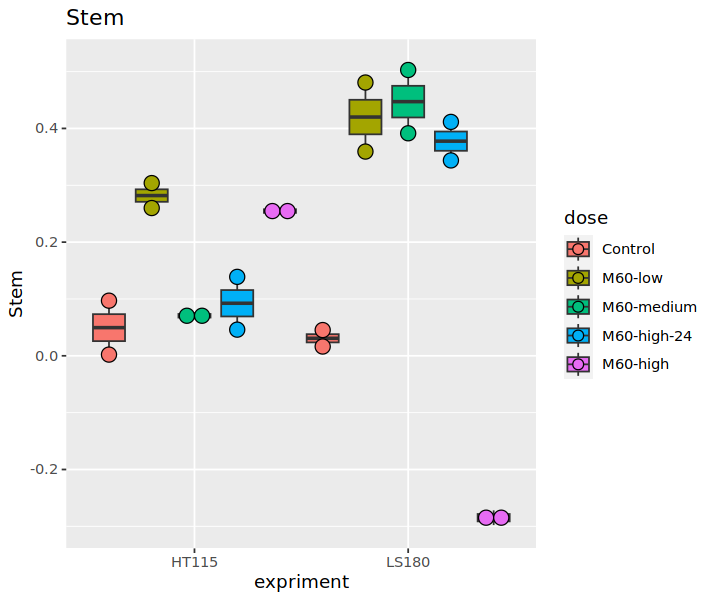

In [78]:
tmp.signagure <- "Stem"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


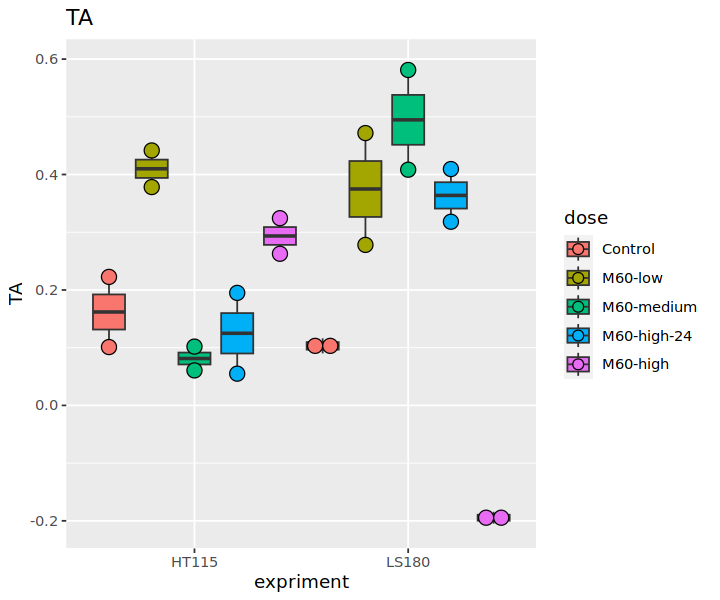

In [79]:
tmp.signagure <- "TA"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


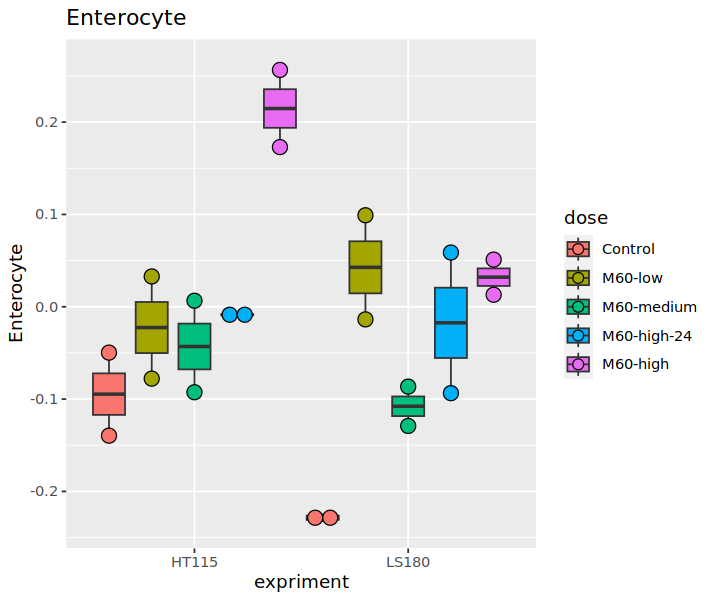

In [80]:
tmp.signagure <- "Enterocyte"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


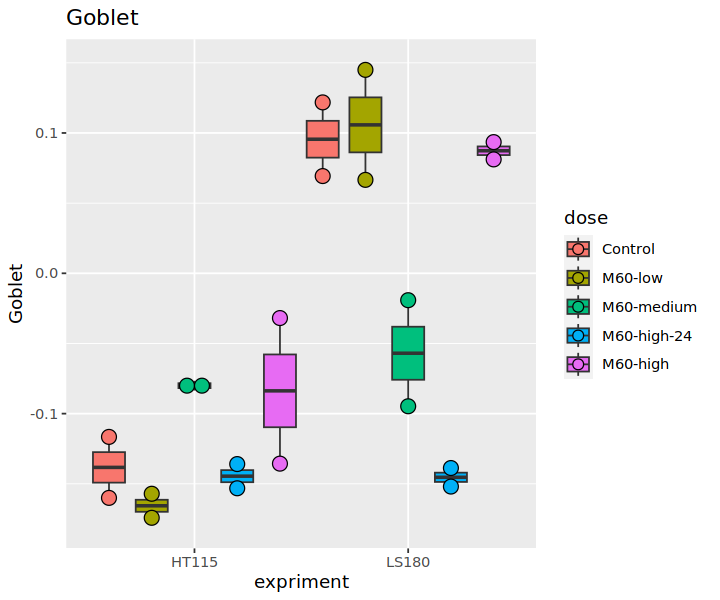

In [200]:
tmp.signagure <- "Goblet"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


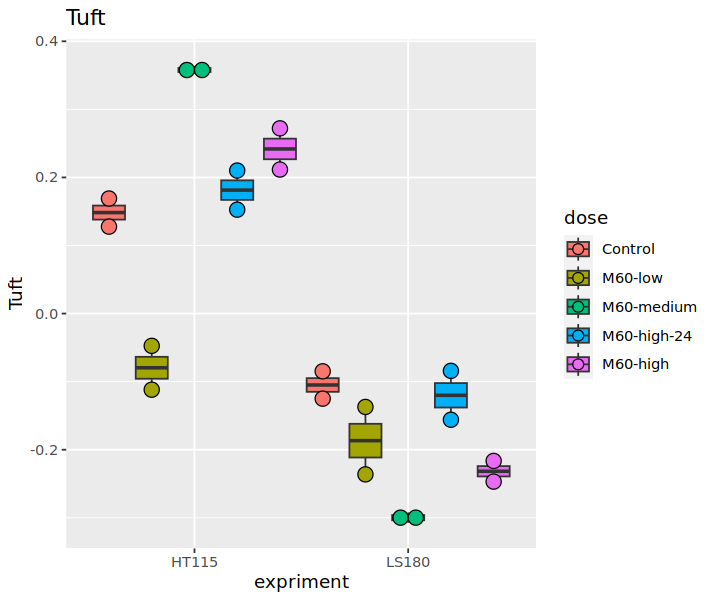

In [201]:
tmp.signagure <- "Tuft"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


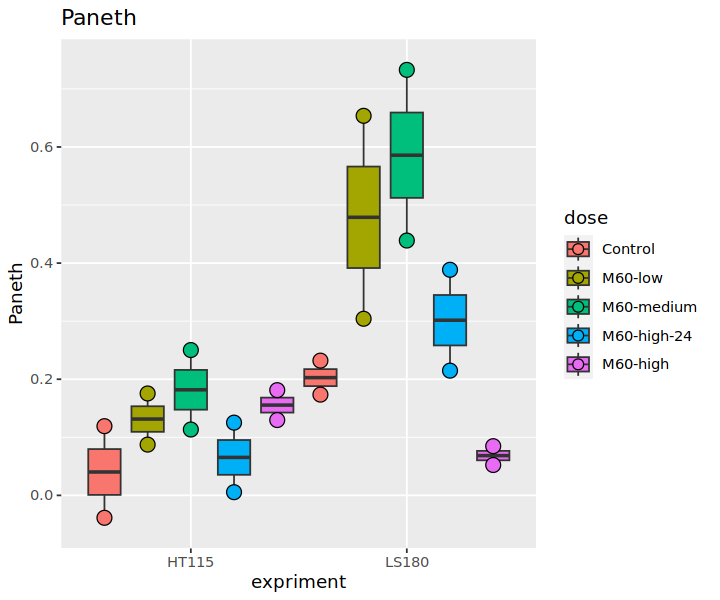

In [202]:
tmp.signagure <- "Paneth"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


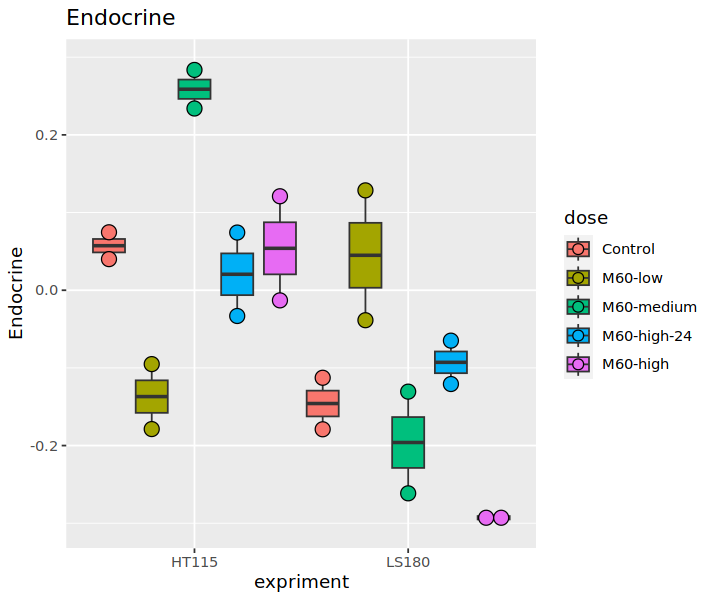

In [203]:
tmp.signagure <- "Endocrine"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

In [194]:
save(M60.count, scaleCPM, MRK60_meta, file = "keyRdata/M60.count.Rdata")

In [85]:
GOI <- c("LGR5", "ASCL2", "OLFM4", "LRIG1", "CA2", "AKR1B10", "SLC4A4", "PCK1", "PFKFB2")

In [86]:
MRK60_meta <- cbind(MRK60_meta, t(scaleCPM[GOI,rownames(MRK60_meta)]))

In [87]:
tmp.meta <- cbind(tmp.meta, t(scaleCPM[GOI,rownames(tmp.meta)]))

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


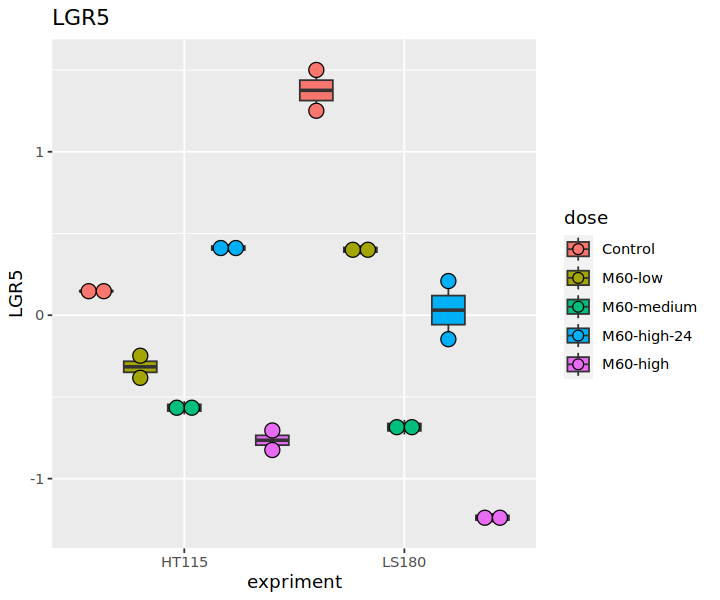

In [35]:
tmp.signagure <- GOI[1]
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


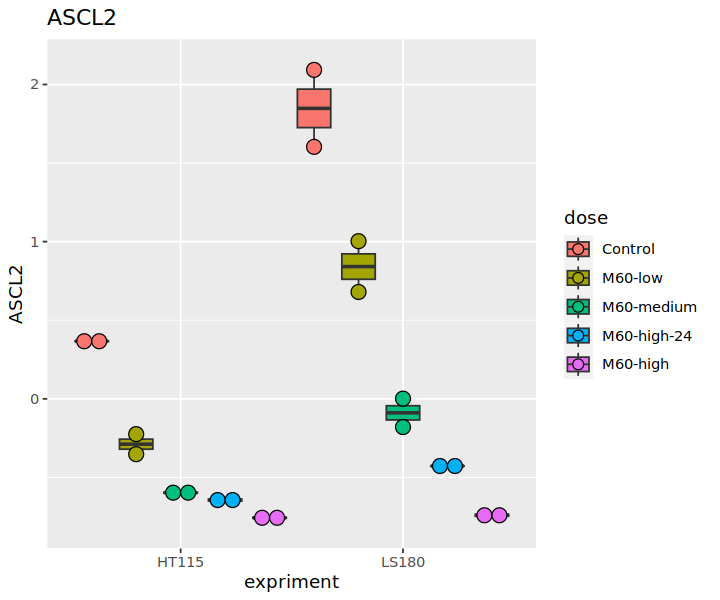

In [36]:
tmp.signagure <- GOI[2]
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


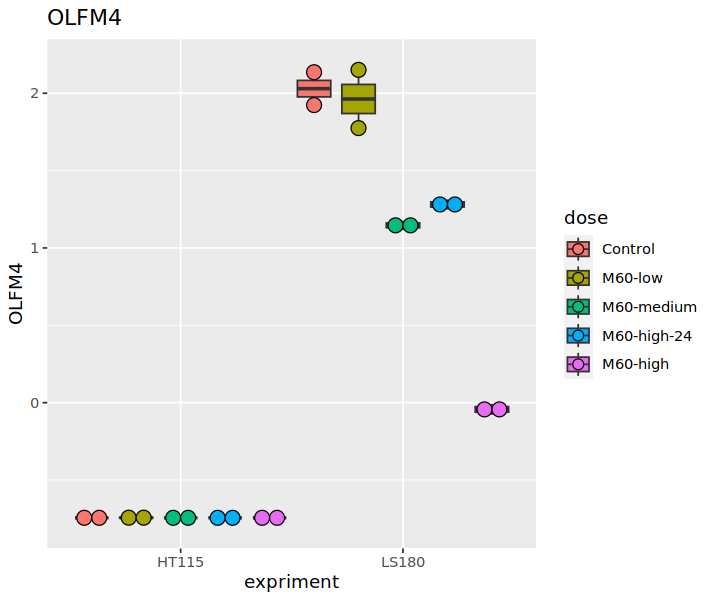

In [37]:
tmp.signagure <- GOI[3]
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


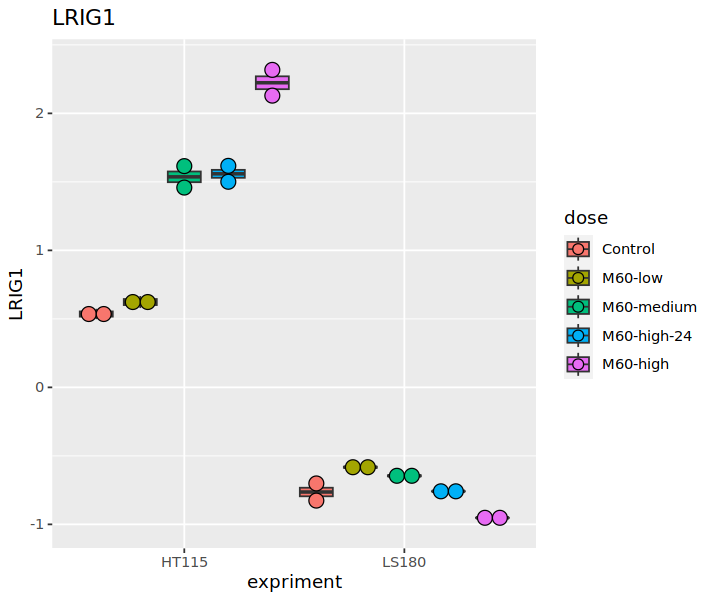

In [38]:
tmp.signagure <- GOI[4]
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p

In [85]:
GOI <- c("LGR5", "ASCL2", "OLFM4", "LRIG1", "CA2", "AKR1B10", "SLC4A4", "PCK1", "PFKFB2")

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


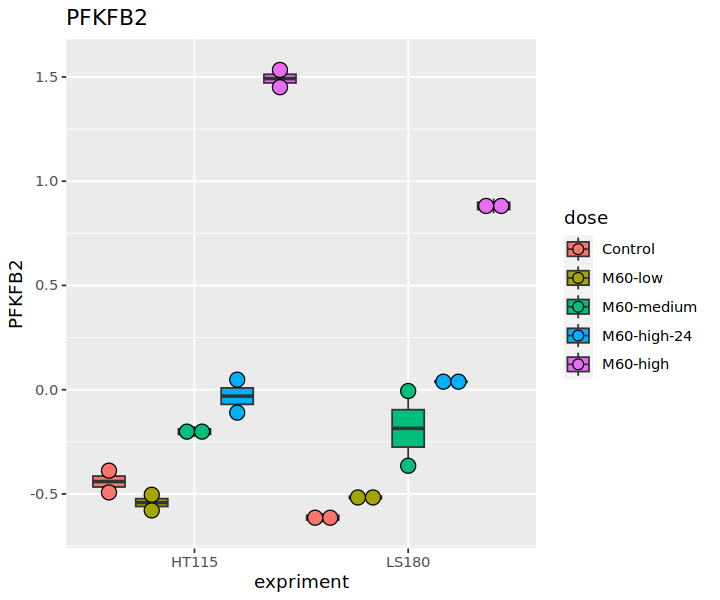

In [93]:
tmp.signagure <- "PFKFB2"
options(repr.plot.width=6, repr.plot.height=5)
p <- ggplot(tmp.meta, aes_string(x="expriment", y=tmp.signagure, fill="dose")) +
        geom_boxplot(position=position_dodge(1)) +
        geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1)) +
    ggtitle(tmp.signagure)
p